# <span style="color:darkblue"> Lecture 11: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [64]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size = "5">

Install the "statsmodels" library
- Run "pip3 install statsmodels" in the terminal
- Automatically included in Anaconda

In [65]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [66]:
dataset = pd.DataFrame([])

<font size = "5">

Create two random variables of size ($n = 50$)

In [67]:
n = 50
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)


<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [68]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [69]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

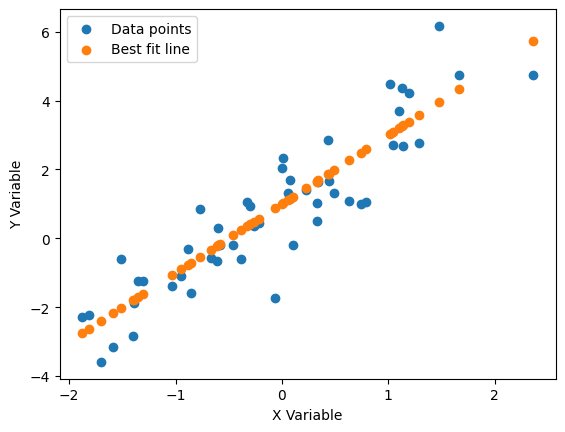

In [70]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.scatter(x = dataset["x"], y = dataset["p"])

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- This subsets records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [71]:
# Write your own code here
subset_above2 = dataset.query("y>=2")
print(len(dataset))
print(len(subset_above2))
proportion = len(subset_above2) / len(dataset)
print(proportion)



50
13
0.26


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@ybar```,$\text{ }$ ```@stdv_sample```

In [72]:
# Note: abs(...) is the absolute value function
# Write your own code 
ybar = dataset["y"].mean()
stdv_sample = dataset["y"].std()
dataset.query("abs(y-@ybar) <= @stdv_sample")

,x,e,y,p
0,0.744277,-1.481427,1.007126,2.488553
1,-0.263844,-0.116177,0.356135,0.472312
3,-0.217492,-0.130620,0.434396,0.565016
5,0.325267,-0.627557,1.022977,1.650535
6,1.290080,-0.812409,2.767751,3.580161
9,-0.381643,-0.832950,-0.596237,0.236714
10,0.102635,-1.397122,-0.191852,1.205270
11,-0.600818,0.497171,0.295535,-0.201636
12,-0.578876,-0.028096,-0.185848,-0.157752
13,-1.301726,0.362530,-1.240923,-1.603452


# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [73]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model   = smf.ols(formula = 'y ~  x',data = dataset)
results = model.fit(cov_type = "HC1")

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


<font size = "5">

Compute the estimated best fit line

In [74]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    0.939083
x            2.005188
dtype: float64


<font size = "5">

Plot the best fit line

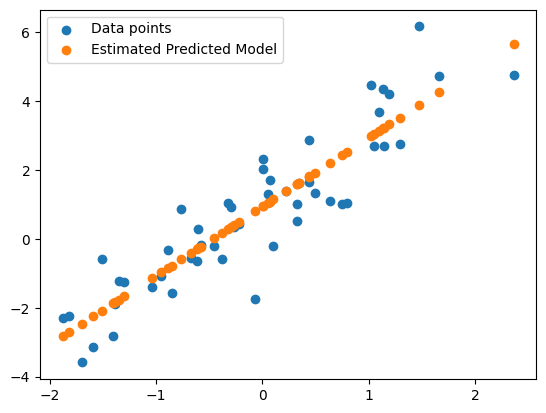

In [75]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.scatter(x = dataset["x"],y = dataset["p_estimated"])

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping scatterplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

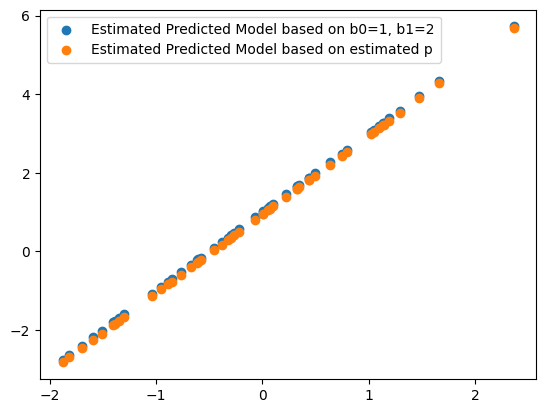

In [80]:
# Write your own code
plt.scatter(x = dataset["x"],y = dataset["p"])
plt.scatter(x = dataset["x"],y = dataset["p_estimated"])

plt.legend(labels = ["Estimated Predicted Model based on b0=1, b1=2","Estimated Predicted Model based on estimated p"])
plt.show()



<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error  error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [86]:
# Write your own code
dataset["sample_error"] = dataset["y"] - dataset["p_estimated"]
fn_positive_error = lambda error: error >= 0
dataset["positive error"] = dataset["sample_error"].apply(fn_positive_error)
display(dataset)


,x,e,y,p,p_estimated,positive error,sample_error
0,0.744277,-1.481427,1.007126,2.488553,2.431498,False,-1.424372
1,-0.263844,-0.116177,0.356135,0.472312,0.410027,False,-0.053891
2,-1.389654,-0.109591,-1.888899,-1.779308,-1.847434,False,-0.041465
3,-0.217492,-0.130620,0.434396,0.565016,0.502971,False,-0.068575
4,-1.697450,-1.194909,-3.589809,-2.394900,-2.464623,False,-1.125186
5,0.325267,-0.627557,1.022977,1.650535,1.591305,False,-0.568328
6,1.290080,-0.812409,2.767751,3.580161,3.525937,False,-0.758185
7,2.360864,-0.973474,4.748255,5.721728,5.673059,False,-0.924805
8,-1.400413,-1.021894,-2.822719,-1.800825,-1.869007,False,-0.953712
9,-0.381643,-0.832950,-0.596237,0.236714,0.173817,False,-0.770054


<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [89]:
# Write your own code
dataset["error_sqr"] = dataset["sample_error"] ** 2
print(dataset["error_sqr"].mean())
display(dataset)





0.8713389589495405


,x,e,y,p,p_estimated,positive error,sample_error,error_sqr
0,0.744277,-1.481427,1.007126,2.488553,2.431498,False,-1.424372,2.028834
1,-0.263844,-0.116177,0.356135,0.472312,0.410027,False,-0.053891,0.002904
2,-1.389654,-0.109591,-1.888899,-1.779308,-1.847434,False,-0.041465,0.001719
3,-0.217492,-0.130620,0.434396,0.565016,0.502971,False,-0.068575,0.004703
4,-1.697450,-1.194909,-3.589809,-2.394900,-2.464623,False,-1.125186,1.266043
5,0.325267,-0.627557,1.022977,1.650535,1.591305,False,-0.568328,0.322997
6,1.290080,-0.812409,2.767751,3.580161,3.525937,False,-0.758185,0.574845
7,2.360864,-0.973474,4.748255,5.721728,5.673059,False,-0.924805,0.855264
8,-1.400413,-1.021894,-2.822719,-1.800825,-1.869007,False,-0.953712,0.909566
9,-0.381643,-0.832950,-0.596237,0.236714,0.173817,False,-0.770054,0.592983
